In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('sp500_joined_closes.csv', index_col='Date')

Index(['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES',
       'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN',
       'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO',
       'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC',
       'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON',
       'AOS', 'APA'],
      dtype='object')
                  MMM        ABT  ABBV  ACN      ATVI
Date                                                 
2000-01-03  30.614885  10.056676   NaN  NaN  1.251975
2000-01-04  29.398392   9.769344   NaN  NaN  1.213892
2000-01-05  30.249941   9.751384   NaN  NaN  1.218653


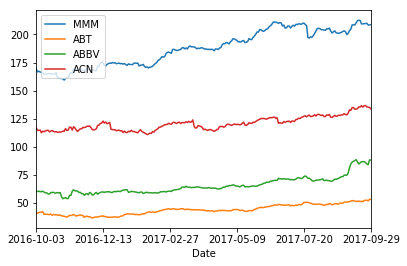

In [2]:
print(data.columns)
print(data.head(n=3).iloc[:,:5])
data.fillna(0, inplace=True)
start = '2016-10'
end = '2017-10'
plt.figure(figsize=(14, 8))
data[start:end].iloc[:, :4].plot()
plt.show()

                 MMM       ABT      ABBV       ACN      ATVI       AYI  \
Date                                                                     
2016-12-28 -0.441372  0.744868  0.080806 -0.466614  0.798814 -0.220828   
2016-12-29 -0.448055  0.734109  0.050744 -0.455563  0.792669 -0.248456   
2016-12-30 -0.471039  0.717365  0.001303 -0.439751  0.788324 -0.236266   

                ADBE       AMD       AAP       AES    ...         AMGN  \
Date                                                  ...                
2016-12-28  0.817830 -0.438891 -0.493720  0.218611    ...     0.795763   
2016-12-29  0.815374 -0.433420 -0.490615  0.209318    ...     0.785452   
2016-12-30  0.814744 -0.434744 -0.495404  0.212023    ...     0.769338   

                 APH       APC       ADI      ANDV      ANSS      ANTM  \
Date                                                                     
2016-12-28 -0.673110 -0.241964 -0.585708 -0.523129 -0.109116 -0.676398   
2016-12-29 -0.662245 -0.245738 -0.58

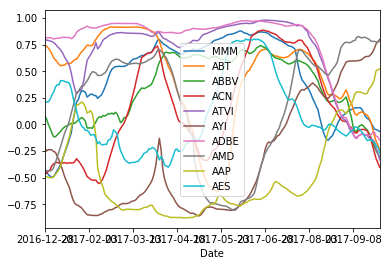

In [3]:
amzn_cor = data[start:end].rolling(window=60).corr(other=data['AMZN'])[60:]
print(amzn_cor.head(n=3))
amzn_cor.iloc[:, :10].plot()
plt.show()

In [14]:
amzn_corr = pd.melt(amzn_cor.reset_index(), id_vars=['Date'], var_name='Ticker', value_name='Corr') 

In [17]:
print(amzn_corr.head(n=10))
print(amzn_corr.tail(n=10))

         Date Ticker      Corr
0  2016-12-28    MMM -0.441372
1  2016-12-29    MMM -0.448055
2  2016-12-30    MMM -0.471039
3  2017-01-03    MMM -0.485373
4  2017-01-04    MMM -0.495340
5  2017-01-05    MMM -0.491323
6  2017-01-06    MMM -0.460534
7  2017-01-09    MMM -0.431814
8  2017-01-10    MMM -0.406331
9  2017-01-11    MMM -0.372627
            Date Ticker      Corr
9540  2017-09-18    APA  0.715097
9541  2017-09-19    APA  0.716036
9542  2017-09-20    APA  0.715871
9543  2017-09-21    APA  0.719365
9544  2017-09-22    APA  0.714638
9545  2017-09-25    APA  0.698310
9546  2017-09-26    APA  0.682490
9547  2017-09-27    APA  0.703396
9548  2017-09-28    APA  0.700978
9549  2017-09-29    APA  0.697262


In [40]:
df = amzn_corr.Ticker.str.split('A', expand=True)

In [48]:
amzn_corr_flat = amzn_corr.pivot_table(index=['Date'], columns='Ticker', values='Corr')
amzn_corr_flat.reset_index(inplace=True)
print(amzn_corr_flat.iloc[:5,:5])

Ticker        Date         A       AAL       AAP      ABBV
0       2016-12-28  0.187104 -0.704570 -0.493720  0.080806
1       2016-12-29  0.154149 -0.694371 -0.490615  0.050744
2       2016-12-30  0.099772 -0.683607 -0.495404  0.001303
3       2017-01-03  0.024058 -0.671530 -0.499046 -0.035593
4       2017-01-04 -0.063412 -0.655974 -0.500294 -0.078915


In [52]:
x=amzn_corr.drop_duplicates()
print(amzn_corr.shape)
print(x.shape)

(9550, 3)
(9550, 3)


In [65]:
import glob
concat_files = glob.glob('stock_dfs/*.csv')

In [64]:
print(concat_files)

['stock_dfs/A.csv', 'stock_dfs/AAL.csv', 'stock_dfs/AAP.csv', 'stock_dfs/AAPL.csv', 'stock_dfs/ABBV.csv', 'stock_dfs/ABC.csv', 'stock_dfs/ABT.csv', 'stock_dfs/ACN.csv', 'stock_dfs/ADBE.csv', 'stock_dfs/ADI.csv', 'stock_dfs/ADM.csv', 'stock_dfs/ADP.csv', 'stock_dfs/ADS.csv', 'stock_dfs/ADSK.csv', 'stock_dfs/AEE.csv', 'stock_dfs/AEP.csv', 'stock_dfs/AES.csv', 'stock_dfs/AET.csv', 'stock_dfs/AFL.csv', 'stock_dfs/AGN.csv', 'stock_dfs/AIG.csv', 'stock_dfs/AIV.csv', 'stock_dfs/AIZ.csv', 'stock_dfs/AJG.csv', 'stock_dfs/AKAM.csv', 'stock_dfs/ALB.csv', 'stock_dfs/ALGN.csv', 'stock_dfs/ALK.csv', 'stock_dfs/ALL.csv', 'stock_dfs/ALLE.csv', 'stock_dfs/ALXN.csv', 'stock_dfs/AMAT.csv', 'stock_dfs/AMD.csv', 'stock_dfs/AME.csv', 'stock_dfs/AMG.csv', 'stock_dfs/AMGN.csv', 'stock_dfs/AMP.csv', 'stock_dfs/AMT.csv', 'stock_dfs/AMZN.csv', 'stock_dfs/ANDV.csv', 'stock_dfs/ANSS.csv', 'stock_dfs/ANTM.csv', 'stock_dfs/AON.csv', 'stock_dfs/AOS.csv', 'stock_dfs/APA.csv', 'stock_dfs/APC.csv', 'stock_dfs/APD.csv', 

In [71]:
list_concat_df = [pd.read_csv(csv_filename) for csv_filename in concat_files]

In [72]:
concat_loop = pd.concat(list_concat_df)

In [70]:
print(concat_loop.count())

Date         301193
Open         301192
High         301192
Low          301192
Close        301192
Adj Close    301192
Volume       301192
dtype: int64
